In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn.datasets
import pandas as pd

In [2]:
mpl.rcParams['font.size'] = 15

# Aufgabe 15

## a) Datensatz laden

In [3]:
X,y = sklearn.datasets.make_blobs(
    n_samples=1000,
    centers=2,
    n_features=4,
    random_state=0)

In [4]:
X,y

(array([[ 0.03838985,  4.73689528,  1.64932579,  1.62203216],
        [-1.28401419,  2.51704755, -2.26981563,  7.3654357 ],
        [ 2.13045411,  4.47629174,  2.07632954,  0.99711812],
        ...,
        [ 0.63459198,  4.32807824,  3.33507954,  0.01169718],
        [ 0.73493229,  3.42559698,  2.75464801, -0.16355863],
        [ 0.37243053,  3.15423326,  3.15357106,  0.75982448]]),
 array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
        1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 1

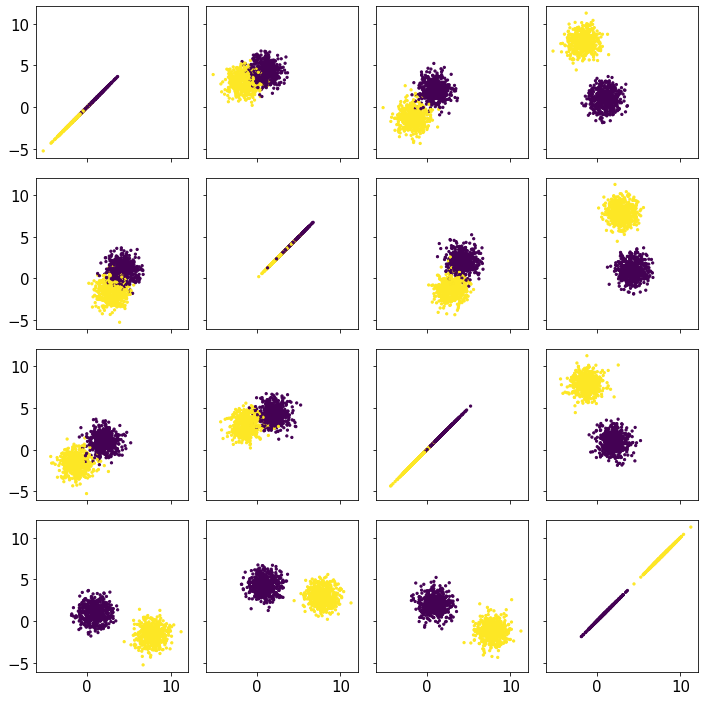

In [5]:
# Confusion Matrix
fig, axes = plt.subplots(4,4,figsize=(10,10),sharex=True,sharey=True)

for i in range(4):
    for j in range(4):
        axes[i,j].scatter(X[:,i],X[:,j],s=5,c=y)
        axes[i,j].set_aspect('equal')
plt.tight_layout()

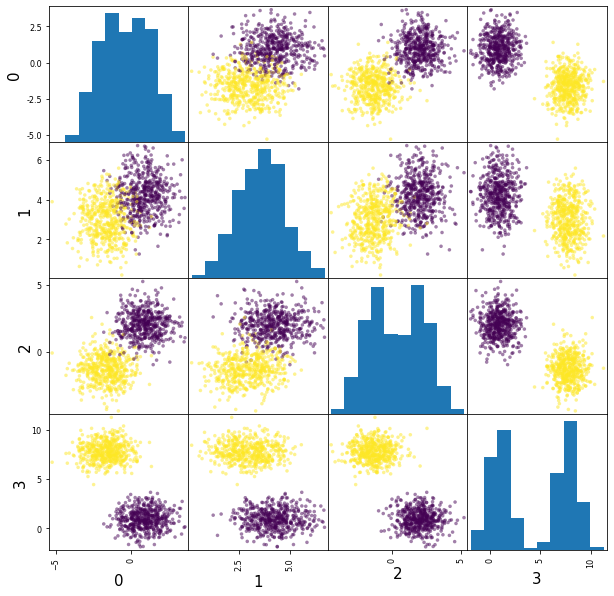

In [32]:
pd.plotting.scatter_matrix(pd.DataFrame(X),figsize=(10,10),s=50,c=y);

## b) Hauptkomponentenanalyse

In [20]:
import sklearn.decomposition

In [21]:
pca = sklearn.decomposition.PCA()
X_ = pca.fit_transform(X)

In [22]:
X_.shape

(1000, 4)

In [23]:
covariance = pca.get_covariance()
covariance

array([[ 2.62583302,  0.80302067,  2.12234349, -4.3783228 ],
       [ 0.80302067,  1.33533433,  1.09428645, -2.18876646],
       [ 2.12234349,  1.09428645,  3.69087992, -5.66291375],
       [-4.3783228 , -2.18876646, -5.66291375, 12.75375474]])

In [24]:
l, W = np.linalg.eigh(covariance)
print(f'Eigenwerte=\n{l}\n\nEigenvektoren=\n{W}')

Eigenwerte=
[ 0.89875061  0.98813673  0.99958442 17.51933024]

Eigenvektoren=
[[-0.1888122  -0.45174256 -0.81331229 -0.31432743]
 [-0.82630524  0.53883501 -0.04672846 -0.15713986]
 [ 0.52973932  0.66484304 -0.33530128 -0.40611949]
 [ 0.03075479  0.25212938 -0.47319407  0.84354745]]


Ein Eigenwert ist deutlich größer, also scheint es zu reichen auf nur diese Diemension zu reduzieren.

## c) PCA darstellen

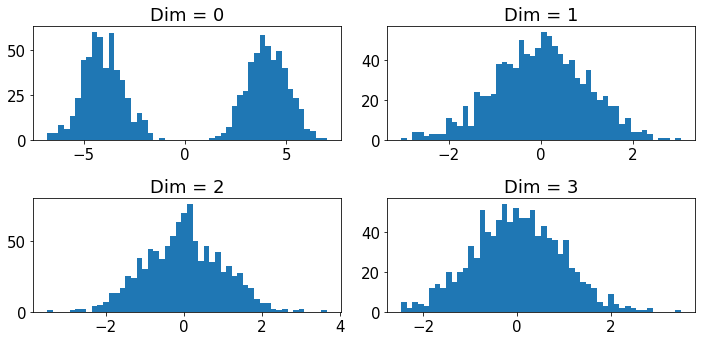

In [25]:
fig,axes = plt.subplots(2,2,figsize=(10,5))
for i,ax in enumerate(axes.flatten()):
    ax.hist(X_[:,i],bins=50)
    ax.set_title(f'Dim = {i}')
plt.tight_layout()

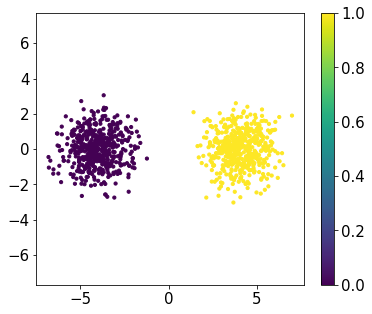

In [34]:
plt.figure(figsize=(6,5))
plt.scatter(X_[:,0],X_[:,1],s=10,c=y)
plt.axis('equal')
plt.colorbar()
plt.show()